In [9]:
import os
import tarfile
from six.moves import urllib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np




DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018644B4B630>,
      dtype=object)

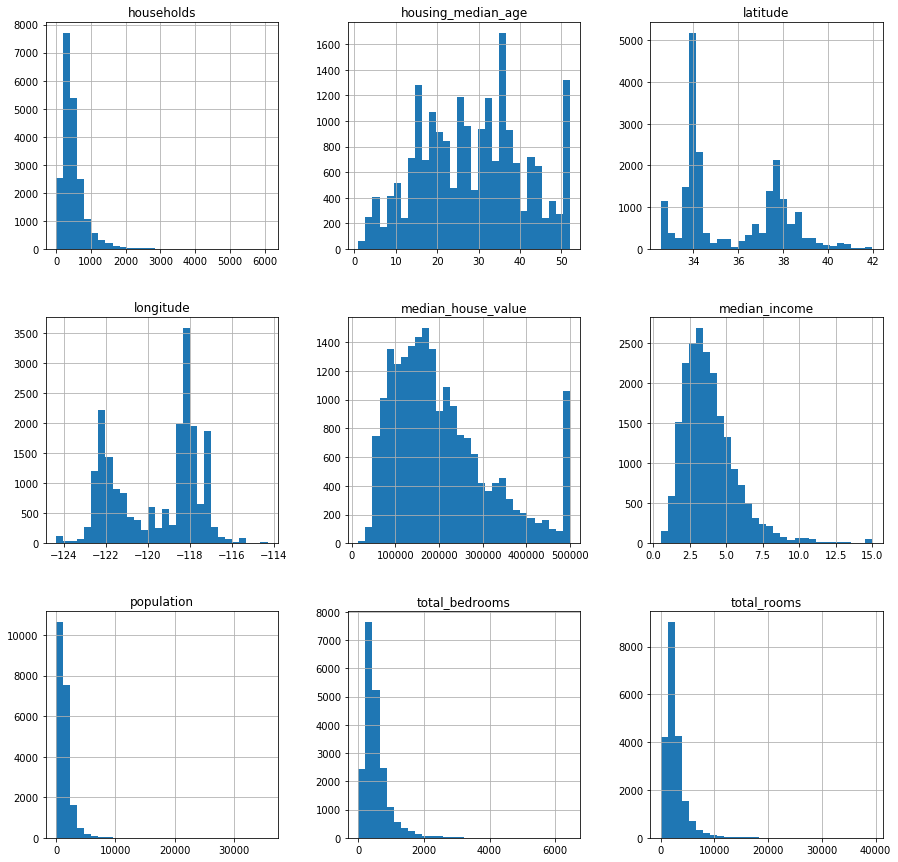

In [10]:
housing.hist(bins = 30, figsize = (15,15))

In [11]:
#Create Train and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 20)

In [17]:
#Stratified Sampling
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].unique()

array([ 6.,  5.,  4.,  3.,  2.,  1.,  8.,  7.,  9., 11., 10.])

In [18]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

In [19]:
housing["income_cat"] 

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [22]:
#Stratified sampling to make sure test set has all income categories representative of the actual population
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 40)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [24]:
#Now that stratified sampling is doen, we remove the income_cat in strat_train_set and start_test_set
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis = 1, inplace = True)

In [25]:
#Create a copy of the train data
housing = strat_train_set.copy()

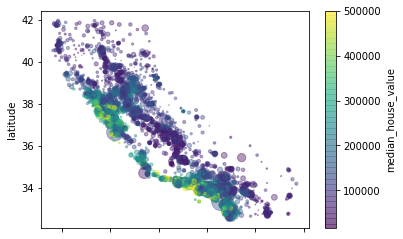

In [40]:
#Visualize geo data
housing.plot(kind = 'scatter', x = "longitude", y = "latitude", alpha = .4,
            s = housing['population']/100, c = 'median_house_value', cmap='viridis', colorbar = True)

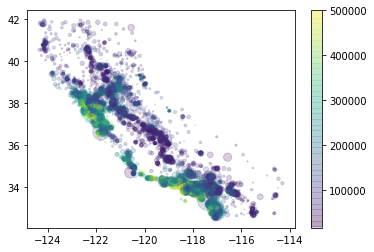

In [38]:
fig, ax = plt.subplots()
viz = ax.scatter("longitude", "latitude", data = housing, 
            marker='o', alpha = 0.2, s = housing['population']/100, c = 'median_house_value', cmap='viridis')

fig.colorbar(viz, ax=ax)


In [44]:
#Correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.686885
total_rooms           0.138058
housing_median_age    0.105304
households            0.070064
total_bedrooms        0.052868
population           -0.021503
longitude            -0.051170
latitude             -0.137682
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001865317CFD0>,
      dtype=object)

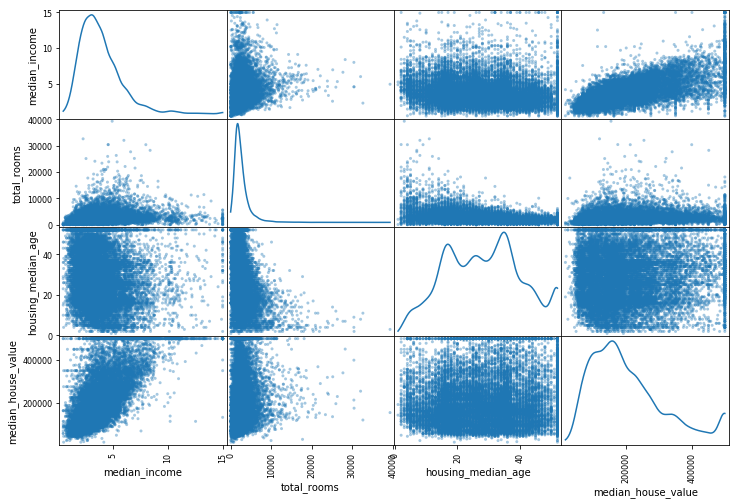

In [49]:
#From prev result, median_income, total_rooms and housing_median_age have good correlation with the house value
from pandas.plotting import scatter_matrix


attributes = ["median_income", "total_rooms","housing_median_age",  "median_house_value"]
scatter_matrix(housing[attributes], figsize = (12,8), alpha = 0.4, diagonal = 'kde')

In [50]:
#Feature Engineering
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['num_bedrooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [52]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.686885
rooms_per_household         0.159500
total_rooms                 0.138058
housing_median_age          0.105304
households                  0.070064
total_bedrooms              0.052868
population                 -0.021503
population_per_household   -0.027110
longitude                  -0.051170
latitude                   -0.137682
num_bedrooms               -0.255168
Name: median_house_value, dtype: float64

In [53]:
#Data cleaning
#Drop Median_house_value from strat_train_set
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [56]:
#missing values
pd.isna(housing).sum()   #Total_bedrooms has 168 missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [60]:
#percentage of missing values
housing.isnull().sum() * 100 / len(housing)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.017442
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
dtype: float64

In [61]:
def missing_data(df):
    x = ['column_name','missing_value_count', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data) 
    
missing_data(housing)

          column_name missing_value_count  missing_in_percentage
0           longitude                   0               0.000000
1            latitude                   0               0.000000
2  housing_median_age                   0               0.000000
3         total_rooms                   0               0.000000
4      total_bedrooms                 168               1.017442
5          population                   0               0.000000
6          households                   0               0.000000
7       median_income                   0               0.000000
8     ocean_proximity                   0               0.000000


In [67]:
#Reusable function to get missing values
def missing_values_table(df):
        missing_value = df.isnull().sum()
        missing_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([missing_value, missing_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[mz_table.iloc[:,0] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_values_table(housing)

Your selected dataframe has 9 columns and 16512 Rows.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Data Type
total_bedrooms,168,1.0,float64


In [73]:
#Imputing Total_bedrooms with median()
#Option 1
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)

#Option 2
#Using Imputer class
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
#Create a copy of the actual dataset without the categorical attribute to calculate median for total_bedrooms
housing_num = housing.drop('ocean_proximity', axis = 1)
#Fitting the imputer instance on the new copy of the dataset
imputer.fit(housing_num)
#we apply the imputer attribute to all the features so that any feature in future that has missing values will be imputed automatically
imputer.statistics_

#Transform the dataset 
X = imputer.transform(housing_num) #Result is a numpy array with all missing values transformed using median

#convert into pandas dataframe
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.38,37.71,47.0,1088.0,190.0,558.0,166.0,4.2708
1,-121.28,38.59,3.0,4188.0,1136.0,2081.0,995.0,3.0481
2,-118.28,34.10,48.0,805.0,246.0,633.0,235.0,2.3421
3,-118.59,34.21,26.0,2335.0,669.0,1986.0,645.0,2.9974
4,-120.97,37.64,42.0,2359.0,504.0,1131.0,480.0,2.0833


In [81]:
#Handling categorical attributes
#Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
print(encoder.classes_)

#LabelEncoder not preferred in this case as it assigns unique number to each category


['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [92]:
#We need OneHot Encoder to make this more meaningful
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_hot_encoded = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
#Note that housing_cat_encoded is used. OneHotEncoder cannot directly code text data
#it needs text converted to string. Can be overcome while using LabelBinarizer directly
housing_cat_hot_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [94]:
#Both LabelEncoding + OnehotEncoding together can be accomplished at one shot using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing['ocean_proximity'])
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [88]:
#One hot encoding using get_dummies() in pandas. 
#Here if we include ddummy_na=True, it will create a separate column if value is NA
pd.get_dummies(housing, prefix = 'close_to').head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,close_to_<1H OCEAN,close_to_INLAND,close_to_ISLAND,close_to_NEAR BAY,close_to_NEAR OCEAN
16177,-122.38,37.71,47.0,1088.0,190.0,558.0,166.0,4.2708,0,0,0,1,0
13074,-121.28,38.59,3.0,4188.0,1136.0,2081.0,995.0,3.0481,0,1,0,0,0
4375,-118.28,34.10,48.0,805.0,246.0,633.0,235.0,2.3421,1,0,0,0,0
3931,-118.59,34.21,26.0,2335.0,669.0,1986.0,645.0,2.9974,1,0,0,0,0
19528,-120.97,37.64,42.0,2359.0,504.0,1131.0,480.0,2.0833,0,1,0,0,0


In [104]:
#Feature_scaling
#Why is it needed?
#to scale the predictors (not the target)
#ML algorithms do not perform well if the predictors are of different scales
#Two techniques
#MinMaxScaler and StandardScaler
#How to get numerical attributes form housing?
#Example: num_features = housing.select_dtypes(include = [np.number]) 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_prep = scaler.fit_transform(housing_tr)

In [107]:
#Select and train a model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prep, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(housing_prep)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69462.86594043569

In [111]:
#Since rmse for Linear Regression is too high , we try nother model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prep, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [112]:
housing_pred = tree_reg.predict(housing_prep)
tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse  #Overfitting????

0.0